In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def E(data_, h_pd=None, a=None, b=None):
	if isinstance(h_pd, pd.DataFrame): 
		eta = h_pd['h'] / data_['A']
	else: 
		eta = data_['h'] / data_['A']
	if a is None: 
		a, b = 0, 1

	E = pd.Series(0, index=data_.index)  # 각 row별로 저장할 E를 Series로 초기화

	t = [45, 55, 65, 75, 85]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']

	for i in range(5):
		phi_t = np.exp(-eta / data_['eta_tilde' + age[i]])
		N_t = data_['RN' + age[i]] * data_['N']
		E += (a * t[i] + b) * N_t * phi_t  # row-wise 연산

	return E  # 각 row별 E 값이 담긴 Series 반환


def b(data_, a):
	atNp, E_0 = 0,0
	eta = data_['h']/data_['A']
	t = [45, 55, 65, 75, 85]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']
	for i in range(5): 
		E_0 += sum(data_['RD'+age[i]]*data_['D'])
		phi_t = np.exp(-eta/data_['eta_tilde'+age[i]])
		N_t = data_['RN'+age[i]]*data_['N']
		atNp += sum( a*t[i]*N_t*phi_t)
	return (E_0-atNp)/E_0 # b

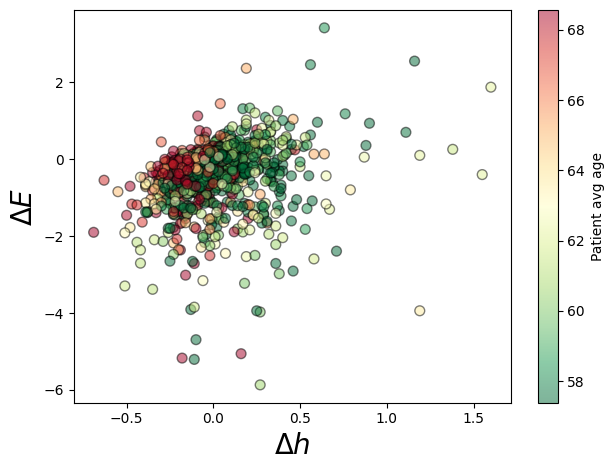

In [3]:
for year in range(2014, 2023):
    # year = 2014
    data_path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/dataframe_40/'+str(year)+'_40.txt'
    h_01_path='/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_5.csv'
    h_00_path='/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_15.csv'

    data = pd.read_csv(data_path, sep=',')
    h_01=pd.read_csv(h_01_path)
    h_00=pd.read_csv(h_00_path)

    # 연령대별 중심값
    age_groups = ['40_49', '50_59', '60_69', '70_79', '80_']
    age_centers = [45, 55, 65, 75, 85]

    # 숫자형 컬럼만 선택
    df_numeric = data.select_dtypes(include=[np.number])

    # 연령대별 신환자 비율 컬럼 찾기
    rn_columns = [col for col in df_numeric.columns if col.startswith("RN") and col[2:] in age_groups]

    # 가중 평균 나이 계산 (groupby 없이 로우 순서 그대로)
    data["weighted_age"] = data[rn_columns].mul(age_centers).sum(axis=1)

    a_01=-0.1
    b_01 = b(data, a_01)
    E_01 = E(data, h_01, a_01, b_01)

    E_00 = E(data, h_00, 0, 1)

    dh = h_01 - h_00
    dE = E_01 - E_00

    # Scatter plot, 컬러 값은 weighted_age
    plt.scatter(dh, dE, c=data["weighted_age"], ec='k', s=50, cmap='RdYlGn_r', alpha=0.5)  # cmap은 색상 맵
    # 레이블 설정
    plt.xlabel(r'$\Delta h$', size=20)
    plt.ylabel(r'$\Delta E$', size=20)

plt.colorbar(label=r'Patient avg age')  # 컬러바 레이블
plt.tight_layout()
plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/dh_dE_age/dh_dE_Nage.pdf',transparent=True,format='pdf')
plt.show()

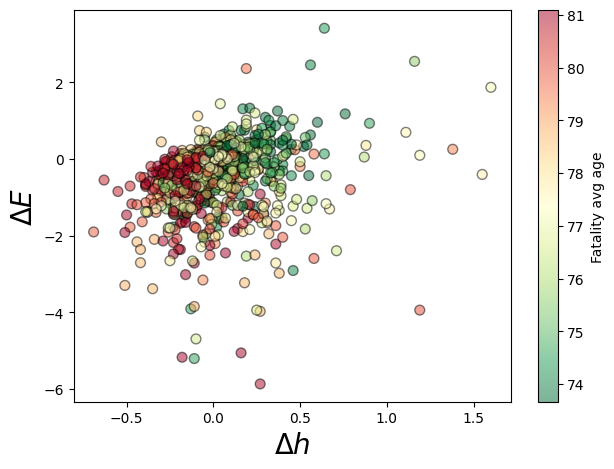

In [4]:
for year in range(2014, 2023):
    # year = 2014
    data_path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/dataframe_40/'+str(year)+'_40.txt'
    h_01_path='/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_5.csv'
    h_00_path='/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b/opt_E_h_a015_005/'+str(year)+'MC_age_h_opt_a_15.csv'

    data = pd.read_csv(data_path, sep=',')
    h_01=pd.read_csv(h_01_path)
    h_00=pd.read_csv(h_00_path)

    # 연령대별 중심값
    age_groups = ['40_49', '50_59', '60_69', '70_79', '80_']
    age_centers = [45, 55, 65, 75, 85]

    # 숫자형 컬럼만 선택
    df_numeric = data.select_dtypes(include=[np.number])

    # 연령대별 신환자 비율 컬럼 찾기
    rn_columns = [col for col in df_numeric.columns if col.startswith("RD") and col[2:] in age_groups]

    # 가중 평균 나이 계산 (groupby 없이 로우 순서 그대로)
    data["weighted_age"] = data[rn_columns].mul(age_centers).sum(axis=1)

    a_01=-0.1
    b_01 = b(data, a_01)
    E_01 = E(data, h_01, a_01, b_01)

    E_00 = E(data, h_00, 0, 1)

    dh = h_01 - h_00
    dE = E_01 - E_00

    # Scatter plot, 컬러 값은 weighted_age
    plt.scatter(dh, dE, c=data["weighted_age"], ec='k', s=50, cmap='RdYlGn_r', alpha=0.5)  # cmap은 색상 맵
    # 레이블 설정
    plt.xlabel(r'$\Delta h$', size=20)
    plt.ylabel(r'$\Delta E$', size=20)

plt.colorbar(label=r'Fatality avg age')  # 컬러바 레이블
plt.tight_layout()
plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/dh_dE_age/dh_dE_Dage.pdf',transparent=True,format='pdf')
plt.show()

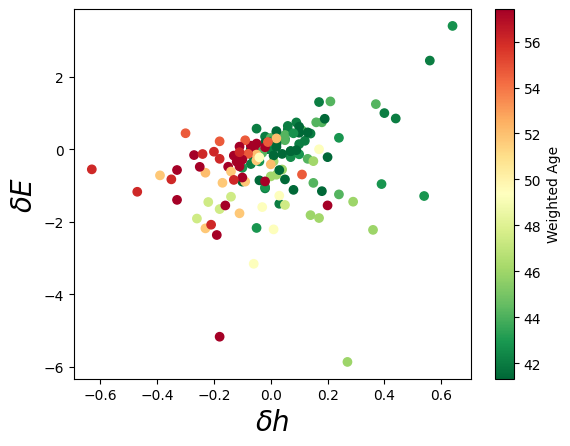

In [44]:
# Scatter plot, 컬러 값은 weighted_age
plt.scatter(dh, dE, c=data["weighted_age"], cmap='RdYlGn_r')  # cmap은 색상 맵
# 레이블 설정
plt.xlabel(r'$\Delta h$', size=20)
plt.ylabel(r'$\Delta E$', size=20)

# 컬러바 추가
plt.colorbar(label=r'Weighted Age')  # 컬러바 레이블

# 그래프 출력
plt.show()

In [31]:
data

,sido,sigungu,A,N,D,h,RN0_9,RN10_19,RN20_29,RN30_39,...,RD60_69,RD70_79,RD80_,eta_tilde,eta_tilde40_49,eta_tilde50_59,eta_tilde60_69,eta_tilde70_79,eta_tilde80_,h_opt_age
0,Seoul,강남구,39.501308,433.0,12.0,4,0.002339,0.038591,0.143839,0.139453,...,0.128852,0.277311,0.355742,0.028240,0.022632,0.026750,0.028017,0.035612,0.048336,4
1,Seoul,강동구,24.589280,368.0,18.0,3,0.002339,0.038591,0.143839,0.139453,...,0.128852,0.277311,0.355742,0.040429,0.031234,0.037921,0.040051,0.053620,0.079906,3
2,Seoul,강북구,23.596920,340.0,16.0,1,0.002339,0.038591,0.143839,0.139453,...,0.128852,0.277311,0.355742,0.013866,0.010743,0.013016,0.013737,0.018314,0.027070,1
3,Seoul,강서구,41.436729,307.0,14.0,3,0.002339,0.038591,0.143839,0.139453,...,0.128852,0.277311,0.355742,0.023447,0.018208,0.022023,0.023232,0.030868,0.045337,3
4,Seoul,관악구,29.568727,342.0,14.0,2,0.002339,0.038591,0.143839,0.139453,...,0.128852,0.277311,0.355742,0.021165,0.016561,0.019921,0.020978,0.027569,0.039674,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Gyeongnam,양산시,485.446929,193.0,6.0,2,0.001743,0.037908,0.111547,0.093682,...,0.058824,0.215686,0.562092,0.001187,0.000957,0.001012,0.000973,0.001223,0.002041,2
139,Gyeongnam,진주시,712.957223,238.0,13.0,3,0.001743,0.037908,0.111547,0.093682,...,0.058824,0.215686,0.562092,0.001447,0.001125,0.001199,0.001146,0.001500,0.002891,3
140,Gyeongnam,창원시,747.673362,702.0,30.0,10,0.001743,0.037908,0.111547,0.093682,...,0.058824,0.215686,0.562092,0.004242,0.003354,0.003563,0.003414,0.004384,0.007864,10
141,Jeju,서귀포시,978.426995,284.0,11.0,6,0.008000,0.034667,0.128000,0.130667,...,0.285714,0.142857,0.357143,0.001886,0.001446,0.001765,0.002623,0.001927,0.003494,6


In [39]:
# 연령대별 중심값
age_groups = ['40_49', '50_59', '60_69', '70_79', '80_']
age_centers = [45, 55, 65, 75, 85]

# 숫자형 컬럼만 선택
df_numeric = data.select_dtypes(include=[np.number])

# 연령대별 신환자 비율 컬럼 찾기
rn_columns = [col for col in df_numeric.columns if col.startswith("RN") and col[2:] in age_groups]

# 가중 평균 나이 계산 (groupby 없이 로우 순서 그대로)
data["weighted_age"] = data[rn_columns].mul(age_centers).sum(axis=1)

# 출력
print(data[["sido", "sigungu", "weighted_age"]])

          sido sigungu  weighted_age
0        Seoul    강남구      42.038445
1        Seoul    강동구      42.038445
2        Seoul    강북구      42.038445
3        Seoul    강서구      42.038445
4        Seoul    관악구      42.038445
..         ...     ...           ...
138  Gyeongnam    양산시      49.283224
139  Gyeongnam    진주시      49.283224
140  Gyeongnam    창원시      49.283224
141       Jeju   서귀포시      42.720000
142       Jeju    제주시      42.720000

[143 rows x 3 columns]


In [40]:
data

,sido,sigungu,A,N,D,h,RN0_9,RN10_19,RN20_29,RN30_39,...,RD70_79,RD80_,eta_tilde,eta_tilde40_49,eta_tilde50_59,eta_tilde60_69,eta_tilde70_79,eta_tilde80_,h_opt_age,weighted_age
0,Seoul,강남구,39.501308,433.0,12.0,4,0.002339,0.038591,0.143839,0.139453,...,0.277311,0.355742,0.028240,0.022632,0.026750,0.028017,0.035612,0.048336,4,42.038445
1,Seoul,강동구,24.589280,368.0,18.0,3,0.002339,0.038591,0.143839,0.139453,...,0.277311,0.355742,0.040429,0.031234,0.037921,0.040051,0.053620,0.079906,3,42.038445
2,Seoul,강북구,23.596920,340.0,16.0,1,0.002339,0.038591,0.143839,0.139453,...,0.277311,0.355742,0.013866,0.010743,0.013016,0.013737,0.018314,0.027070,1,42.038445
3,Seoul,강서구,41.436729,307.0,14.0,3,0.002339,0.038591,0.143839,0.139453,...,0.277311,0.355742,0.023447,0.018208,0.022023,0.023232,0.030868,0.045337,3,42.038445
4,Seoul,관악구,29.568727,342.0,14.0,2,0.002339,0.038591,0.143839,0.139453,...,0.277311,0.355742,0.021165,0.016561,0.019921,0.020978,0.027569,0.039674,2,42.038445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Gyeongnam,양산시,485.446929,193.0,6.0,2,0.001743,0.037908,0.111547,0.093682,...,0.215686,0.562092,0.001187,0.000957,0.001012,0.000973,0.001223,0.002041,2,49.283224
139,Gyeongnam,진주시,712.957223,238.0,13.0,3,0.001743,0.037908,0.111547,0.093682,...,0.215686,0.562092,0.001447,0.001125,0.001199,0.001146,0.001500,0.002891,3,49.283224
140,Gyeongnam,창원시,747.673362,702.0,30.0,10,0.001743,0.037908,0.111547,0.093682,...,0.215686,0.562092,0.004242,0.003354,0.003563,0.003414,0.004384,0.007864,10,49.283224
141,Jeju,서귀포시,978.426995,284.0,11.0,6,0.008000,0.034667,0.128000,0.130667,...,0.142857,0.357143,0.001886,0.001446,0.001765,0.002623,0.001927,0.003494,6,42.720000
